In [78]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Initialize Chrome browser using the Service object for ChromeDriver
service = Service(ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.get(url)


In [ ]:
# create a beautiful soup object
html = browser.page_source
soup = BeautifulSoup(html, "html.parser")
#locate the first table tag
#loop through
table = soup.find('table') 
headers = []
for th in table.find_all('th'):
    headers.append(th.get_text(strip=True))
    rows = []
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.get_text(strip=True) for cell in cells]
    if row:  # Avoid adding empty rows (sometimes there may be empty <tr> elements)
        rows.append(row)

# Step 5: Create a DataFrame from the extracted rows and headers
df = pd.DataFrame(rows, columns=headers)
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [ ]:
#crate an empty list and loop through
rows = []
headers = [th.get_text(strip=True) for th in table.find_all('th')]
# Loop through each table row 
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.get_text(strip=True) for cell in cells]
    if row:  # Avoid adding empty rows
        rows.append(row)

# Step 3: Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=headers)

# Step 4: Confirm DataFrame was created
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [ ]:
# Examine the data type of each column in the DataFrame
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [ ]:
# Change the data types of the columns as specified
df['id'] = df['id'].astype('object')  # Ensure the 'id' column is of type object (string)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['sol'] = df['sol'].astype('int32')  # Convert 'sol' to int32
df['ls'] = df['ls'].astype('int32')  # Convert 'ls' to int32
df['month'] = df['month'].astype('int32')  # Convert 'month' to int32
df['min_temp'] = df['min_temp'].astype('float64')  # Convert 'min_temp' to float64
df['pressure'] = df['pressure'].astype('float64')  # Convert 'pressure' to float64

# Check the data types of all columns after conversion
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [ ]:
# How many months are there on Mars. from 'month' column
print(df['month'].nunique())


12


In [ ]:
# How many sol days (martian days)
print(df['month'].count())

1867


In [ ]:
# What is the average minimum temparture by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(average_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


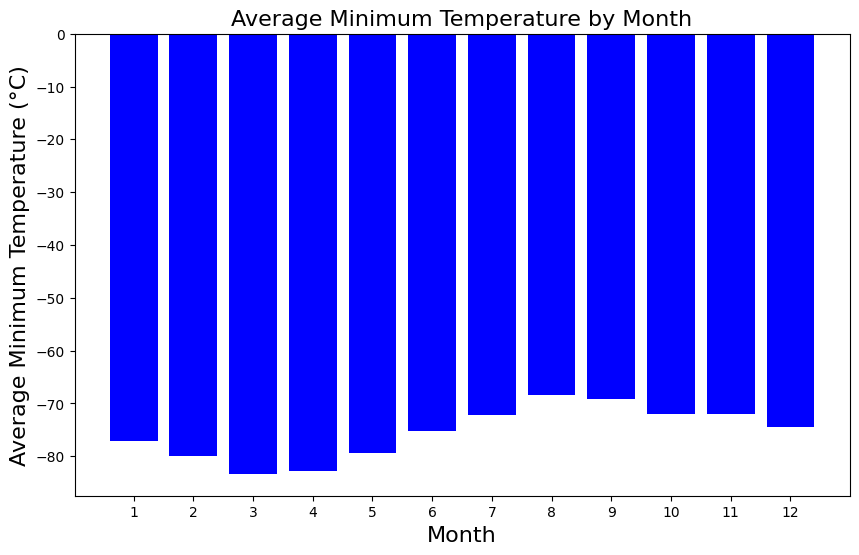

In [ ]:
#plot the average minmum temperature
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plotting the data
# Set the figure size
plt.figure(figsize=(10, 6))  
plt.bar(average_min_temp_by_month.index, average_min_temp_by_month.values, color='blue')

# Adding labels and title
plt.title('Average Minimum Temperature by Month', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=16)

# Displaying the plot
# the x-axis has the months (1 to 12)
plt.xticks(range(1, 13))  # Ensure that the x-axis shows the months (1 to 12)

plt.show()

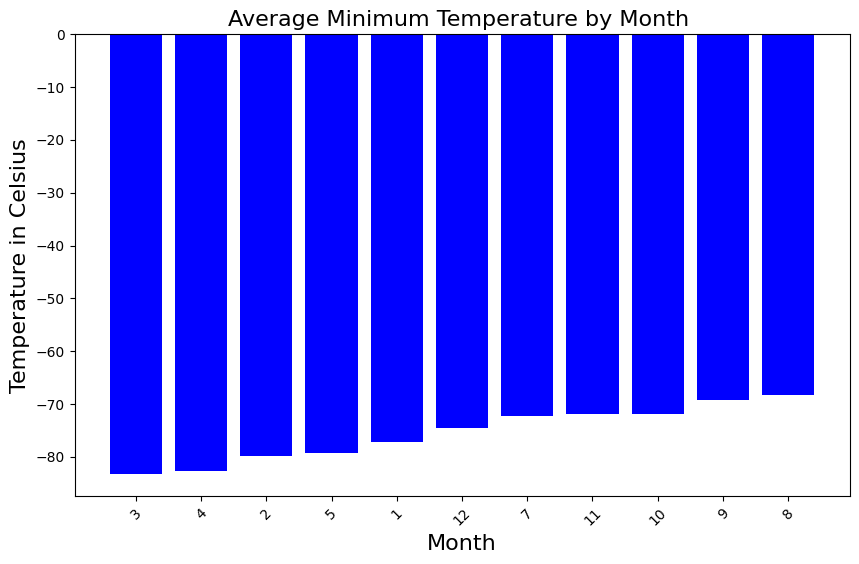

In [101]:
# Identify the coldest and hottest months in Curiosity's location

# Data for min_temp
min_temp_data = {
    1: -77.160920,  # January
    2: -79.932584,  # February
    3: -83.307292,  # March
    4: -82.747423,  # April
    5: -79.308725,  # May
    6: -75.299320,  # June
    7: -72.281690,  # July
    8: -68.382979,  # August
    9: -69.171642,  # September
    10: -71.982143, # October
    11: -71.985507, # November
    12: -74.451807  # December
}

# Create a pandas Series from the min_temp data
min_temp_series = pd.Series(min_temp_data, name='min_temp')

# Custom order of months
custom_month_order = [3, 4, 2, 5, 1, 12, 7, 11, 10, 9, 8]

# Reorder the months and their temperatures according to the custom month order
sorted_min_temp = min_temp_series[custom_month_order]

# Create the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
bar_width = 0.5

# Plot the bars using the sorted data in custom order
plt.bar(range(len(sorted_min_temp)), sorted_min_temp.values, color='blue')

# Add labels and title
plt.title('Average Minimum Temperature by Month ', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Temperature in Celsius', fontsize=16)

# Set the x-axis to show the custom month order as numbers
plt.xticks(range(len(sorted_min_temp)), custom_month_order, rotation=45)

# Show the plot
plt.show()


In [ ]:
# What is the average pressure  by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


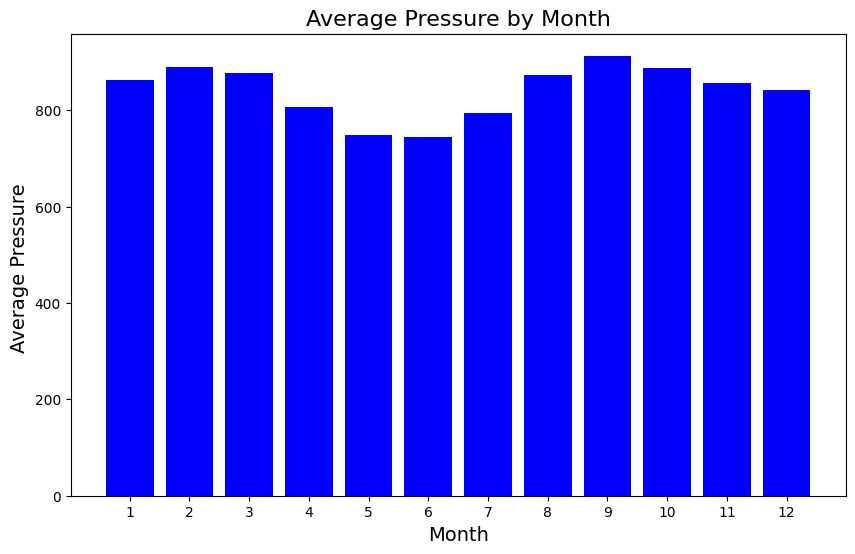

In [ ]:
#plot average pressure by month

# Plotting the average pressure by month
plt.figure(figsize=(10, 6))  
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='blue')

# Adding labels and title
plt.title('Average Pressure by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Pressure ', fontsize=14)

# Displaying the plot
plt.xticks(range(1, 13)) 

plt.show()

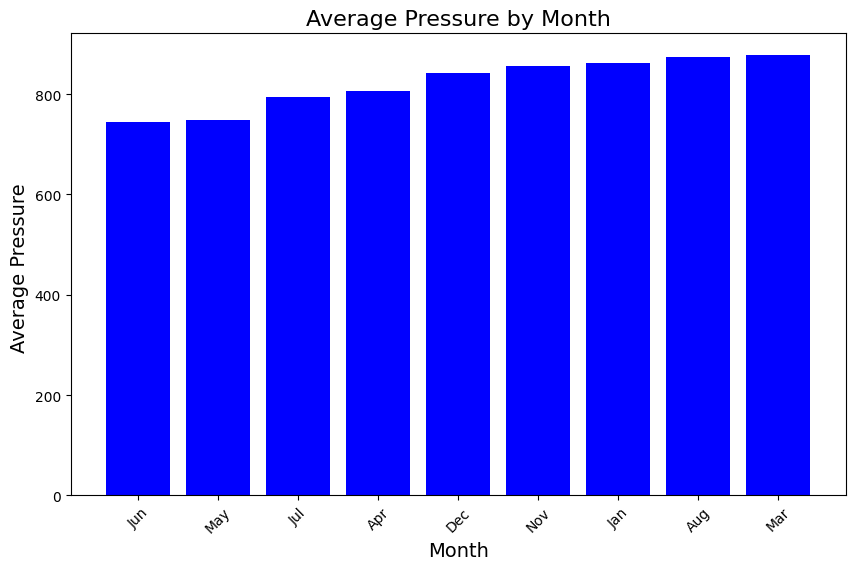

In [139]:
import matplotlib.pyplot as plt



# Define the custom order for the months
custom_month_order = ['Jun', 'May', 'Jul', 'Apr', 'Dec', 'Nov', 'Jan', 'Aug', 'Mar']

# Create a mapping of months to their corresponding index values for the plot
month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}


ordered_months = [month_to_number[month] for month in custom_month_order]
ordered_pressures = [average_pressure_by_month.loc[month] for month in ordered_months]


plt.figure(figsize=(10, 6))  
plt.bar(custom_month_order, ordered_pressures, color='blue')

# Adding labels and title
plt.title('Average Pressure by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Pressure ', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  

plt.show()


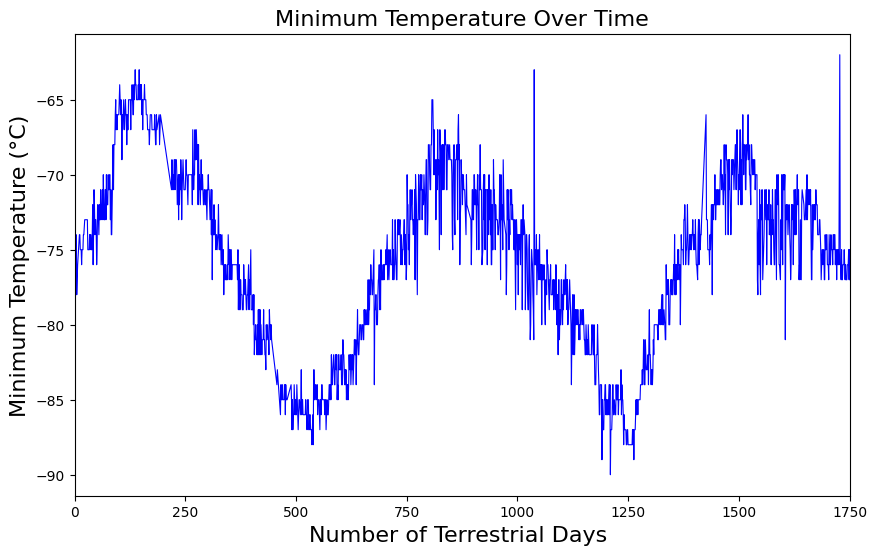

In [ ]:


#  'terrestrial_date' is in datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'terrestrial_date' to the number of days since the start date
start_date = df['terrestrial_date'].min()
df['days_since_start'] = (df['terrestrial_date'] - start_date).dt.days

# Plot the daily minimum temperature against terrestrial days
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df['days_since_start'], df['min_temp'], color='blue', linewidth=0.8)

# labels and title
plt.title('Minimum Temperature Over Time', fontsize=16)
plt.xlabel('Number of Terrestrial Days ', fontsize=16)
plt.ylabel( 'Minimum Temperature (°C)', fontsize=16)


plt.xlim(0, 1750) 
plt.xticks(range(0, 1751, 250)) 




plt.show()


In [ ]:
#Anaylsis

How many months exist on Mars? 
There are 12 months on Mars
How many Martian days
The Sol days are calculated as martian days. The anaylsis shows that there are 1867 days.

Which month, on average, has the lowest temperature? The highest? 
 Augusthas the lowest average temperature, The highest temperature is March.
Which month, on average, has the lowest atmospheric pressure? The highest? 
June has the lowest atmospheric  pressure. The highest was Semptember
How many terrestrial days exist in a Martian year? 
1867

In [ ]:
browser.quit()